In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df=pd.read_csv('TrafficTwoMonth.csv')
df

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,13,2,2,24,41,normal
1,12:15:00 AM,10,Tuesday,14,1,1,36,52,normal
2,12:30:00 AM,10,Tuesday,10,2,2,32,46,normal
3,12:45:00 AM,10,Tuesday,10,2,2,36,50,normal
4,1:00:00 AM,10,Tuesday,11,2,1,34,48,normal
...,...,...,...,...,...,...,...,...,...
5947,10:45:00 PM,9,Thursday,16,3,1,36,56,normal
5948,11:00:00 PM,9,Thursday,11,0,1,30,42,normal
5949,11:15:00 PM,9,Thursday,15,4,1,25,45,normal
5950,11:30:00 PM,9,Thursday,16,5,0,27,48,normal


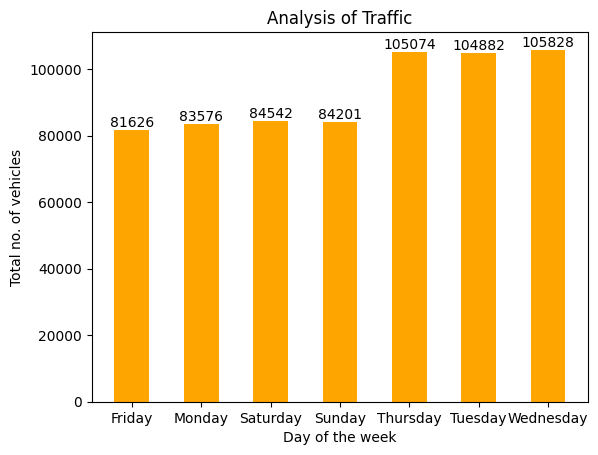

In [3]:

daily_traffic = df.groupby('Day of the week')['Total'].sum()


plt.bar(daily_traffic.index, daily_traffic.values, color='orange', width=0.5)
plt.xlabel('Day of the week')
plt.ylabel('Total no. of vehicles')
plt.title('Analysis of Traffic')


for i, total in enumerate(daily_traffic.values):
    plt.text(i, total, str(total), ha='center', va='bottom')

plt.show()


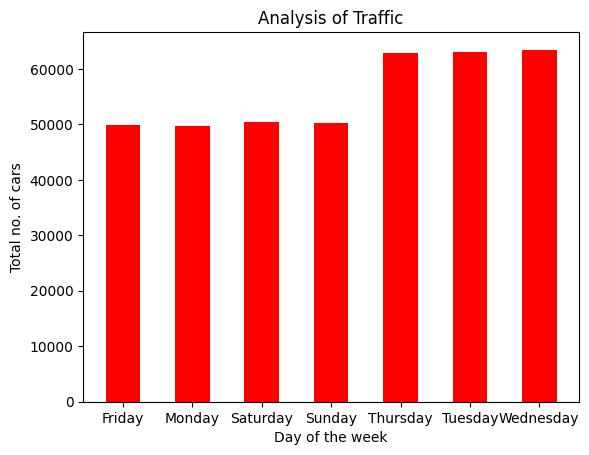

In [4]:
# Group the data by 'Day of the week' and sum the 'Total' column
daily_traffic = df.groupby('Day of the week')['CarCount'].sum()

# Plot the aggregated total number of vehicles for each day of the week
plt.bar(daily_traffic.index, daily_traffic.values, color='red', width=0.5)
plt.xlabel('Day of the week')
plt.ylabel('Total no. of cars')
plt.title('Analysis of Traffic')
plt.show()

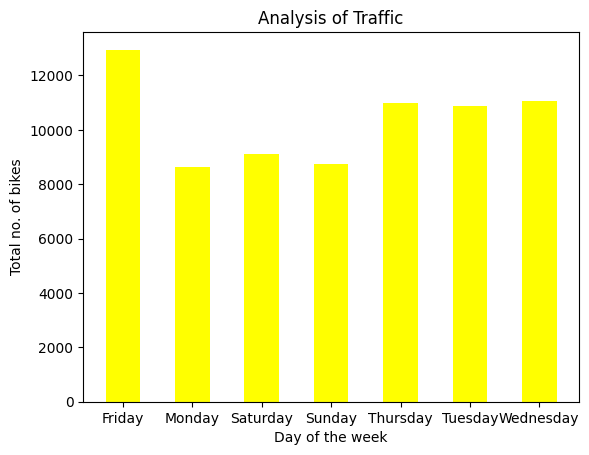

In [5]:
# Group the data by 'Day of the week' and sum the 'Total' column
daily_traffic = df.groupby('Day of the week')['BikeCount'].sum()

# Plot the aggregated total number of vehicles for each day of the week
plt.bar(daily_traffic.index, daily_traffic.values, color='yellow', width=0.5)
plt.xlabel('Day of the week')
plt.ylabel('Total no. of bikes')
plt.title('Analysis of Traffic')
plt.show()

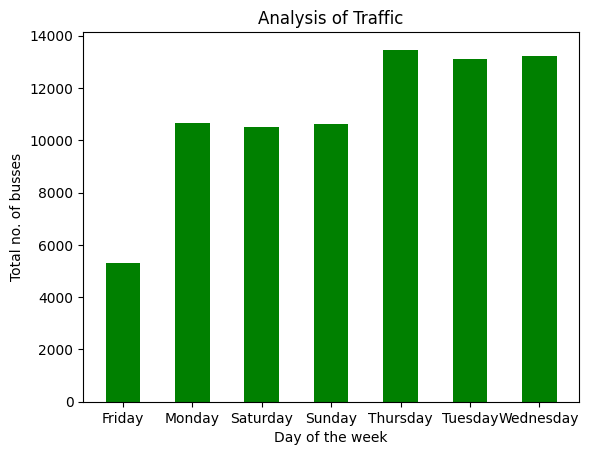

In [6]:
# Group the data by 'Day of the week' and sum the 'Total' column
daily_traffic = df.groupby('Day of the week')['BusCount'].sum()

# Plot the aggregated total number of vehicles for each day of the week
plt.bar(daily_traffic.index, daily_traffic.values, color='green', width=0.5)
plt.xlabel('Day of the week')
plt.ylabel('Total no. of busses')
plt.title('Analysis of Traffic')
plt.show()


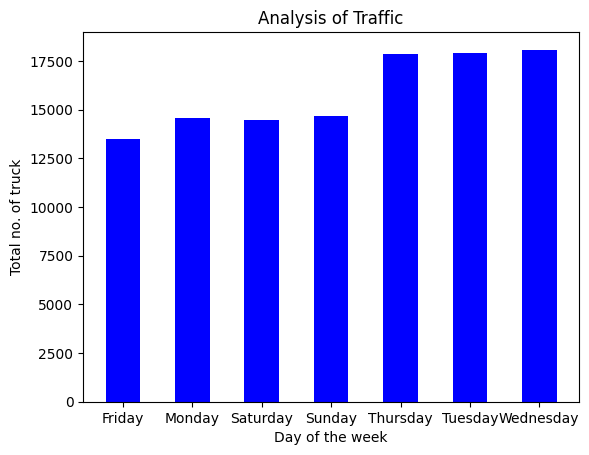

In [7]:
# Group the data by 'Day of the week' and sum the 'Total' column
daily_traffic = df.groupby('Day of the week')['TruckCount'].sum()

# Plot the aggregated total number of vehicles for each day of the week
plt.bar(daily_traffic.index, daily_traffic.values, color='blue', width=0.5)
plt.xlabel('Day of the week')
plt.ylabel('Total no. of truck')
plt.title('Analysis of Traffic')
plt.show()

In [7]:
# Group the data by 'Day of the week' and calculate mean and standard deviation
grouped_data = df.groupby('Day of the week')['Total']
mean_by_day = grouped_data.mean()
std_dev_by_day = grouped_data.std()

# Store mean and standard deviation for each day of the week in a dictionary
day_statistics = {}
for day, mean, std_dev in zip(mean_by_day.index, mean_by_day.values, std_dev_by_day.values):
    day_statistics[day] = {'Mean': mean, 'Standard Deviation': std_dev}

# Print mean and standard deviation for each day of the week
for day, stats in day_statistics.items():
    print(f"Day: {day}, Mean: {stats['Mean']}, Standard Deviation: {stats['Standard Deviation']}")



Day: Friday, Mean: 106.28385416666667, Standard Deviation: 65.66891910061494
Day: Monday, Mean: 108.82291666666667, Standard Deviation: 54.294262180208136
Day: Saturday, Mean: 110.08072916666667, Standard Deviation: 55.364773474118955
Day: Sunday, Mean: 109.63671875, Standard Deviation: 54.33391430033267
Day: Thursday, Mean: 109.45208333333333, Standard Deviation: 54.50937484142575
Day: Tuesday, Mean: 109.25208333333333, Standard Deviation: 53.6920990204269
Day: Wednesday, Mean: 110.2375, Standard Deviation: 54.54630247468717


In [8]:
import numpy as np

def normal_pdf(x, mean, std_dev):
    
    exponent = -0.5 * ((x - mean) / std_dev) ** 2
    pdf = (1 / (np.sqrt(2 * np.pi) * std_dev)) * np.exp(exponent)
    return pdf

print("Enter an x value")
x_value =int(input())  # Example x value
print("Enter day of the week")
s=input()
mean_value = day_statistics[s]['Mean']  # Get mean value from day_statistics dictionary
std_dev_value = day_statistics[s]['Standard Deviation']  
pdf_value = normal_pdf(x_value, mean_value, std_dev_value)
print("PDF value at x =", x_value, ":", pdf_value)


Enter an x value
200
Enter day of the week
Tuesday
PDF value at x = 200 : 0.0017811168151651616


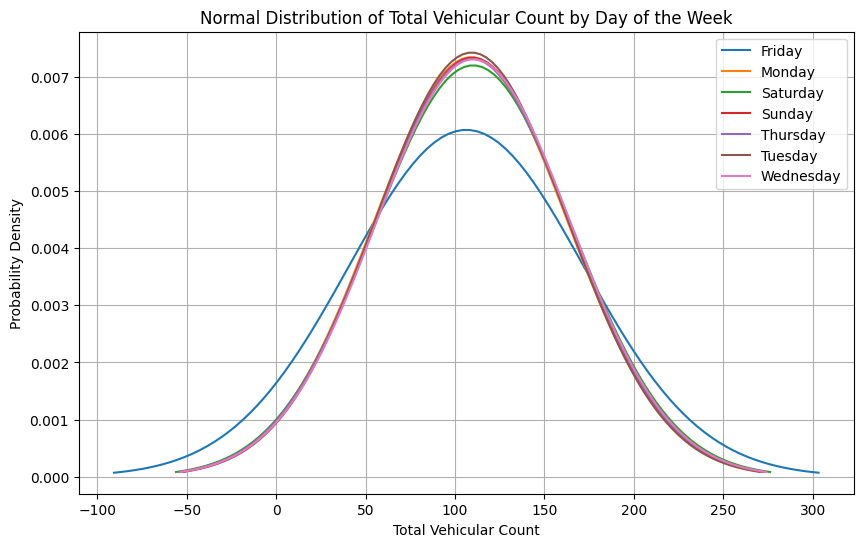

In [9]:
# Assuming df is your DataFrame with columns: 'Day of the week' and 'Total'
# Each row represents the total vehicular count for a 15-minute time interval
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

# Group data by 'Day of the week'
grouped_data = df.groupby('Day of the week')['Total']

# Calculate mean and standard deviation for each day
mean_by_day = grouped_data.mean()
std_dev_by_day = grouped_data.std()

# Plot normal distribution curve for each day
plt.figure(figsize=(10, 6))
for day, data in grouped_data:
    mean = mean_by_day[day]
    std_dev = std_dev_by_day[day]
    x = np.linspace(mean - 3*std_dev, mean + 3*std_dev, 100)  # Generate x-values
    plt.plot(x, stats.norm.pdf(x, mean, std_dev), label=day)  # Plot normal distribution curve

plt.title('Normal Distribution of Total Vehicular Count by Day of the Week')
plt.xlabel('Total Vehicular Count')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()


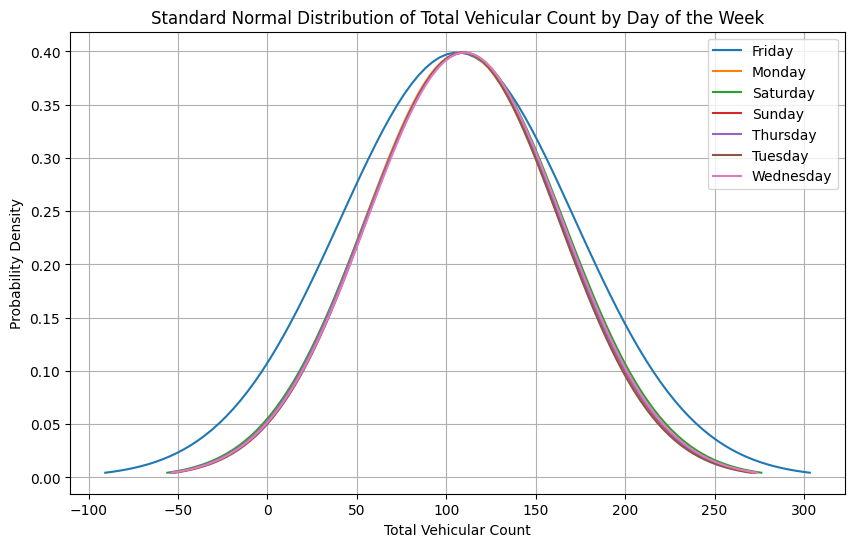

In [12]:

# Group data by 'Day of the week'
grouped_data = df.groupby('Day of the week')['Total']

# Calculate mean and standard deviation for each day
mean_by_day = grouped_data.mean()
std_dev_by_day = grouped_data.std()

# Plot normal distribution curve for each day
plt.figure(figsize=(10, 6))
for i, (day, data) in enumerate(grouped_data):
    mean = mean_by_day[day]
    std_dev = std_dev_by_day[day]
    x = np.linspace(-3, 3, 100)  # Generate x-values for standard normal distribution
    # Scale x-values to match the mean and standard deviation of the current day
    scaled_x = x * std_dev + mean
    plt.plot(scaled_x, stats.norm.pdf(x, 0, 1), label=day)  # Plot standard normal distribution curve

plt.title('Standard Normal Distribution of Total Vehicular Count by Day of the Week')
plt.xlabel('Total Vehicular Count')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()


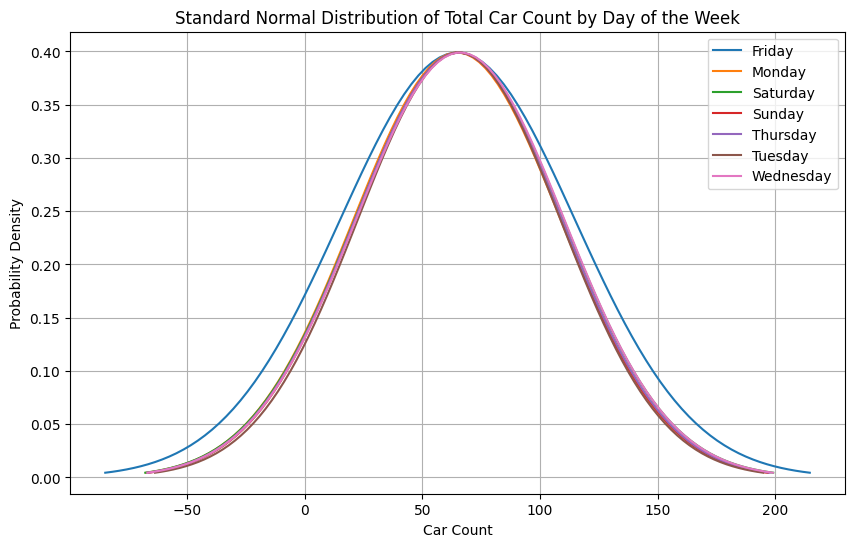

In [6]:
# Group data by 'Day of the week'
grouped_data = df.groupby('Day of the week')['CarCount']

# Calculate mean and standard deviation for each day
mean_by_day = grouped_data.mean()
std_dev_by_day = grouped_data.std()

# Plot normal distribution curve for each day
plt.figure(figsize=(10, 6))
for i, (day, data) in enumerate(grouped_data):
    mean = mean_by_day[day]
    std_dev = std_dev_by_day[day]
    x = np.linspace(-3, 3, 100)  # Generate x-values for standard normal distribution
    # Scale x-values to match the mean and standard deviation of the current day
    scaled_x = x * std_dev + mean
    plt.plot(scaled_x, stats.norm.pdf(x, 0, 1), label=day)  # Plot standard normal distribution curve

plt.title('Standard Normal Distribution of Total Car Count by Day of the Week')
plt.xlabel('Car Count')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()


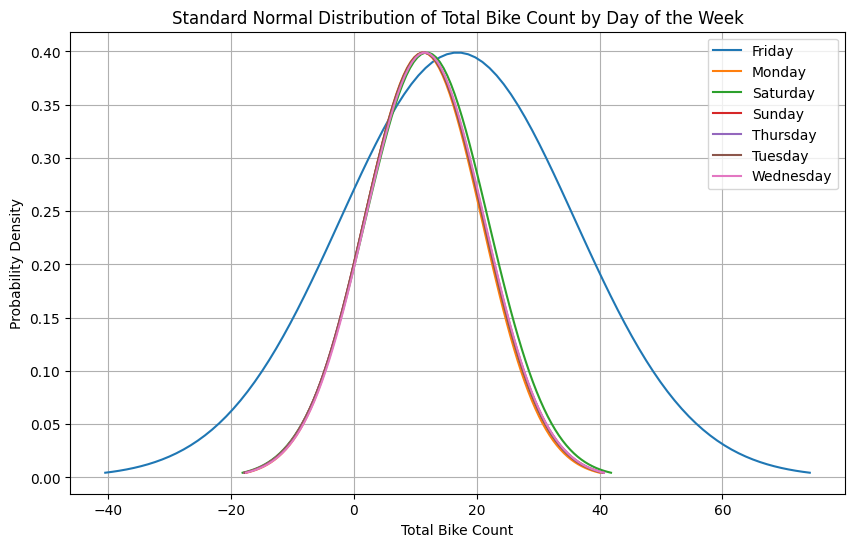

In [13]:
# Group data by 'Day of the week'
grouped_data = df.groupby('Day of the week')['BikeCount']

# Calculate mean and standard deviation for each day
mean_by_day = grouped_data.mean()
std_dev_by_day = grouped_data.std()

# Plot normal distribution curve for each day
plt.figure(figsize=(10, 6))
for i, (day, data) in enumerate(grouped_data):
    mean = mean_by_day[day]
    std_dev = std_dev_by_day[day]
    x = np.linspace(-3, 3, 100)  # Generate x-values for standard normal distribution
    # Scale x-values to match the mean and standard deviation of the current day
    scaled_x = x * std_dev + mean
    plt.plot(scaled_x, stats.norm.pdf(x, 0, 1), label=day)  # Plot standard normal distribution curve

plt.title('Standard Normal Distribution of Total Bike Count by Day of the Week')
plt.xlabel('Total Bike Count')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()


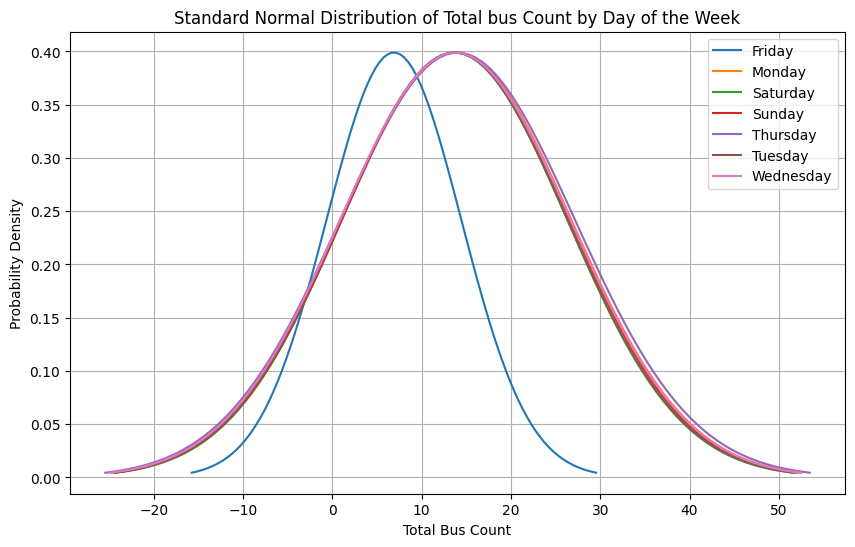

In [8]:
# Group data by 'Day of the week'
grouped_data = df.groupby('Day of the week')['BusCount']

# Calculate mean and standard deviation for each day
mean_by_day = grouped_data.mean()
std_dev_by_day = grouped_data.std()

# Plot normal distribution curve for each day
plt.figure(figsize=(10, 6))
for i, (day, data) in enumerate(grouped_data):
    mean = mean_by_day[day]
    std_dev = std_dev_by_day[day]
    x = np.linspace(-3, 3, 100)  # Generate x-values for standard normal distribution
    # Scale x-values to match the mean and standard deviation of the current day
    scaled_x = x * std_dev + mean
    plt.plot(scaled_x, stats.norm.pdf(x, 0, 1), label=day)  # Plot standard normal distribution curve

plt.title('Standard Normal Distribution of Total bus Count by Day of the Week')
plt.xlabel('Total Bus Count')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()


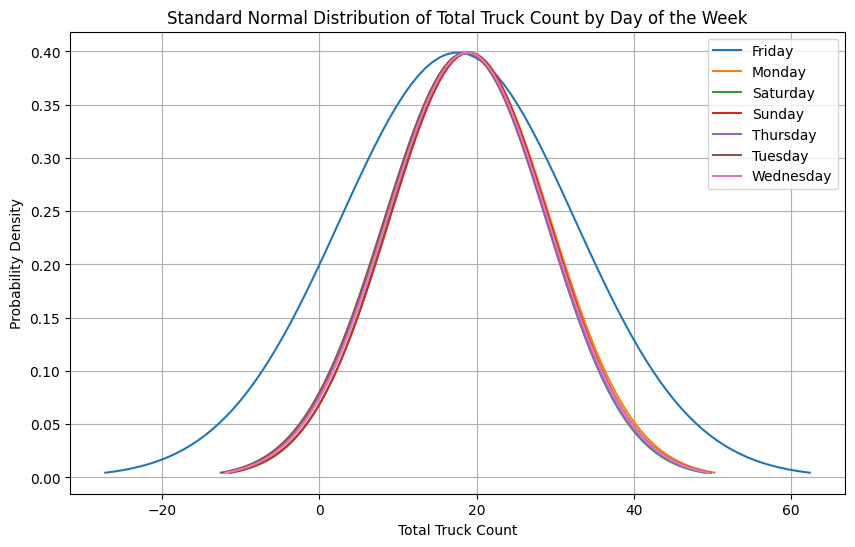

In [14]:
# Group data by 'Day of the week'
grouped_data = df.groupby('Day of the week')['TruckCount']

# Calculate mean and standard deviation for each day
mean_by_day = grouped_data.mean()
std_dev_by_day = grouped_data.std()

# Plot normal distribution curve for each day
plt.figure(figsize=(10, 6))
for i, (day, data) in enumerate(grouped_data):
    mean = mean_by_day[day]
    std_dev = std_dev_by_day[day]
    x = np.linspace(-3, 3, 100)  # Generate x-values for standard normal distribution
    # Scale x-values to match the mean and standard deviation of the current day
    scaled_x = x * std_dev + mean
    plt.plot(scaled_x, stats.norm.pdf(x, 0, 1), label=day)  # Plot standard normal distribution curve

plt.title('Standard Normal Distribution of Total Truck Count by Day of the Week')
plt.xlabel('Total Truck Count')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()


In [5]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Traffic Situation Encoded'] = label_encoder.fit_transform(df['Traffic Situation'])
print("Mapping of original categories to encoded values:")
for category, code in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{category}: {code}")
print(df.head)


Mapping of original categories to encoded values:
heavy: 0
high: 1
low: 2
normal: 3
<bound method NDFrame.head of              Time  Date Day of the week  CarCount  BikeCount  BusCount  \
0     12:00:00 AM    10         Tuesday        13          2         2   
1     12:15:00 AM    10         Tuesday        14          1         1   
2     12:30:00 AM    10         Tuesday        10          2         2   
3     12:45:00 AM    10         Tuesday        10          2         2   
4      1:00:00 AM    10         Tuesday        11          2         1   
...           ...   ...             ...       ...        ...       ...   
5947  10:45:00 PM     9        Thursday        16          3         1   
5948  11:00:00 PM     9        Thursday        11          0         1   
5949  11:15:00 PM     9        Thursday        15          4         1   
5950  11:30:00 PM     9        Thursday        16          5         0   
5951  11:45:00 PM     9        Thursday        14          3         1  

In [4]:
cov_matrix = df[['CarCount', 'BikeCount', 'BusCount', 'TruckCount']].cov()
print("Covariance Matrix:")
print(cov_matrix)

Covariance Matrix:
               CarCount   BikeCount    BusCount  TruckCount
CarCount    2002.502951  365.676944  368.230092 -302.011148
BikeCount    365.676944  133.124154   83.299048  -76.941880
BusCount     368.230092   83.299048  156.193399  -76.574726
TruckCount  -302.011148  -76.941880  -76.574726  120.409770


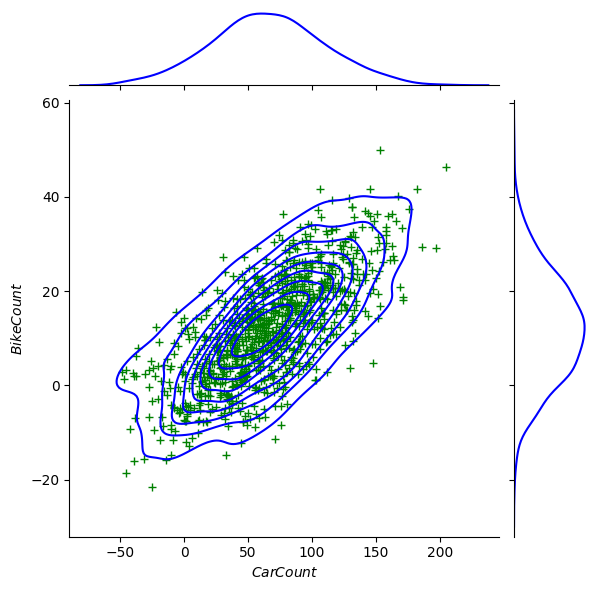

In [17]:
mean = df[['CarCount', 'BikeCount', 'BusCount', 'TruckCount']].mean()
cov_matrix = df[['CarCount', 'BikeCount', 'BusCount', 'TruckCount']].cov()

data = np.random.multivariate_normal(mean, cov_matrix, 1000)
df_generated = pd.DataFrame(data, columns=['CarCount', 'BikeCount', 'BusCount', 'TruckCount'])

g = sns.jointplot(x="CarCount", y="BikeCount", data=df_generated, kind="kde", color="blue")
g.plot_joint(plt.scatter, c="g", s=30, linewidth=1, marker="+")
g.set_axis_labels("$CarCount$", "$BikeCount$")
plt.show()


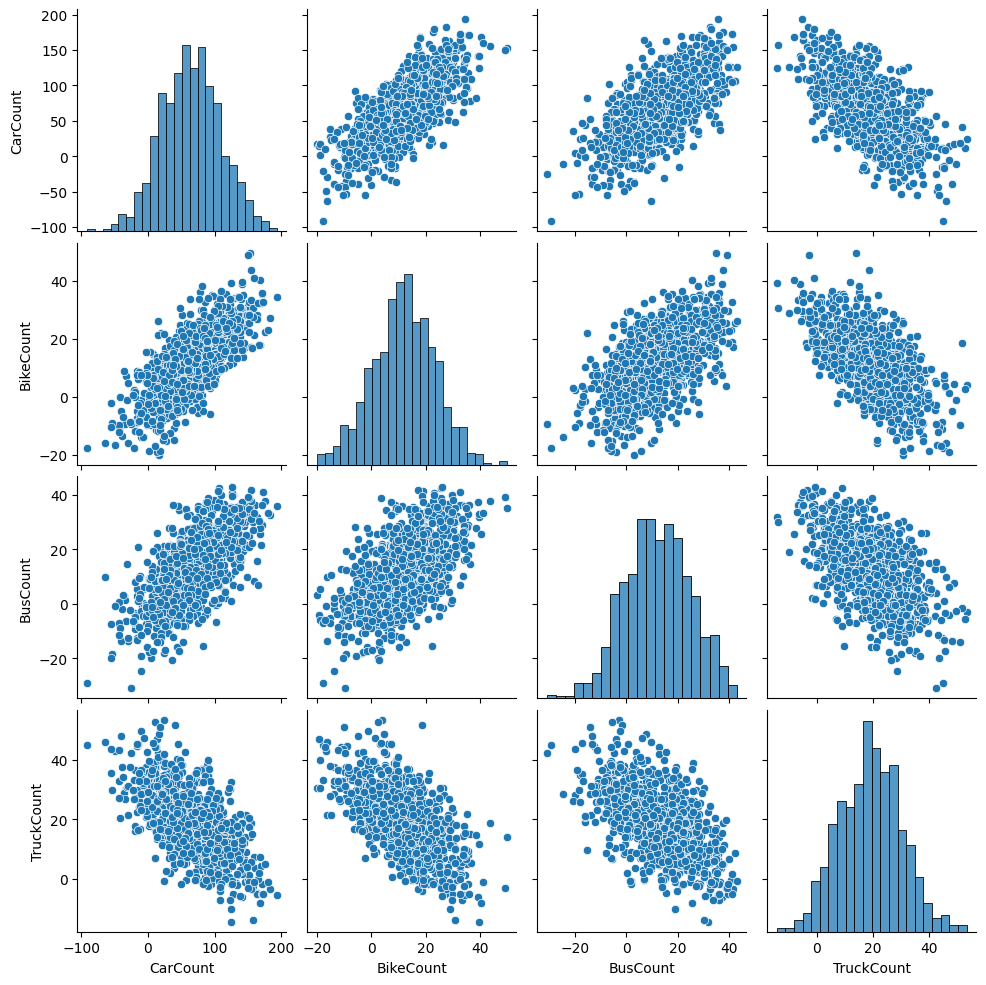

In [18]:

mean = df[['CarCount', 'BikeCount', 'BusCount', 'TruckCount']].mean()
cov_matrix = df[['CarCount', 'BikeCount', 'BusCount', 'TruckCount']].cov()
data = np.random.multivariate_normal(mean, cov_matrix, 1000)
df_generated = pd.DataFrame(data, columns=['CarCount', 'BikeCount', 'BusCount', 'TruckCount'])
sns.pairplot(df_generated)
plt.show()


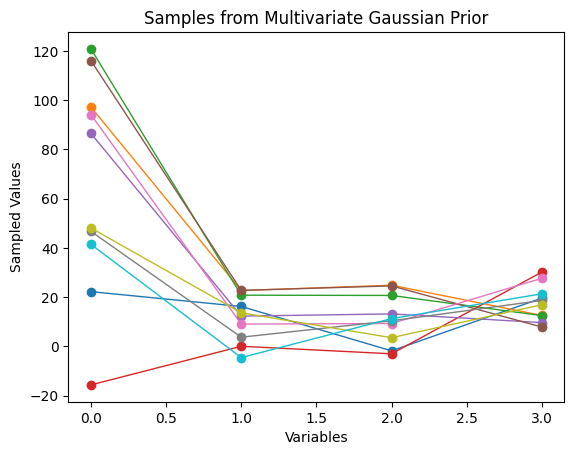

In [19]:
n = 4  # Number of variables (columns) in the dataset
m = 10  # Number of samples
mean = df[['CarCount', 'BikeCount', 'BusCount', 'TruckCount']].mean().values
cov_matrix = df[['CarCount', 'BikeCount', 'BusCount', 'TruckCount']].cov().values
f_prior = np.random.multivariate_normal(mean, cov_matrix, m).T
plt.clf()
Xshow = np.arange(n) 
for i in range(m):
    plt.plot(Xshow, f_prior[:, i], '-o', linewidth=1)

plt.xlabel('Variables')
plt.ylabel('Sampled Values')
plt.title('Samples from Multivariate Gaussian Prior')
plt.savefig('multivariate_gaussian_prior')

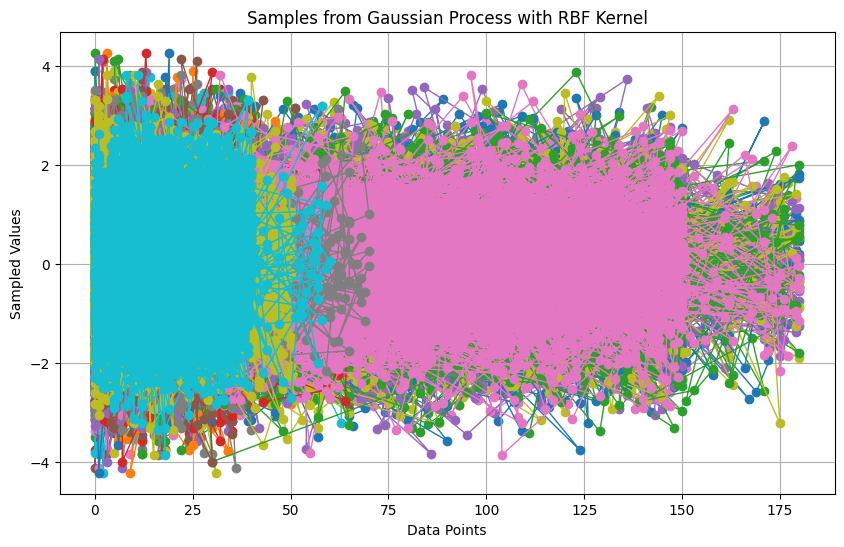

In [20]:
# Define RBF kernel function
def rbf_kernel(X1, X2, length_scale=1.0, sigma=1.0):
    pairwise_dists = np.sum(X1**2, 1).reshape(-1, 1) + np.sum(X2**2, 1) - 2 * np.dot(X1, X2.T)
    return sigma**2 * np.exp(-0.5 * pairwise_dists / length_scale**2)
X = df[['CarCount', 'BikeCount', 'BusCount', 'TruckCount']].values
# Define parameters
n = len(X)  # Number of data points
m = 10      # Number of samples to generate
# Generate covariance matrix using RBF kernel
K = rbf_kernel(X, X)

# Generate mean vector (usually zeros for prior)
mean = np.zeros(n)
f_prior = np.random.multivariate_normal(mean, K, m).T
plt.figure(figsize=(10, 6))
for i in range(m):
    plt.plot(X, f_prior[:, i], '-o', linewidth=1)
plt.xlabel('Data Points')
plt.ylabel('Sampled Values')
plt.title('Samples from Gaussian Process with RBF Kernel')
plt.grid(True)
plt.show()


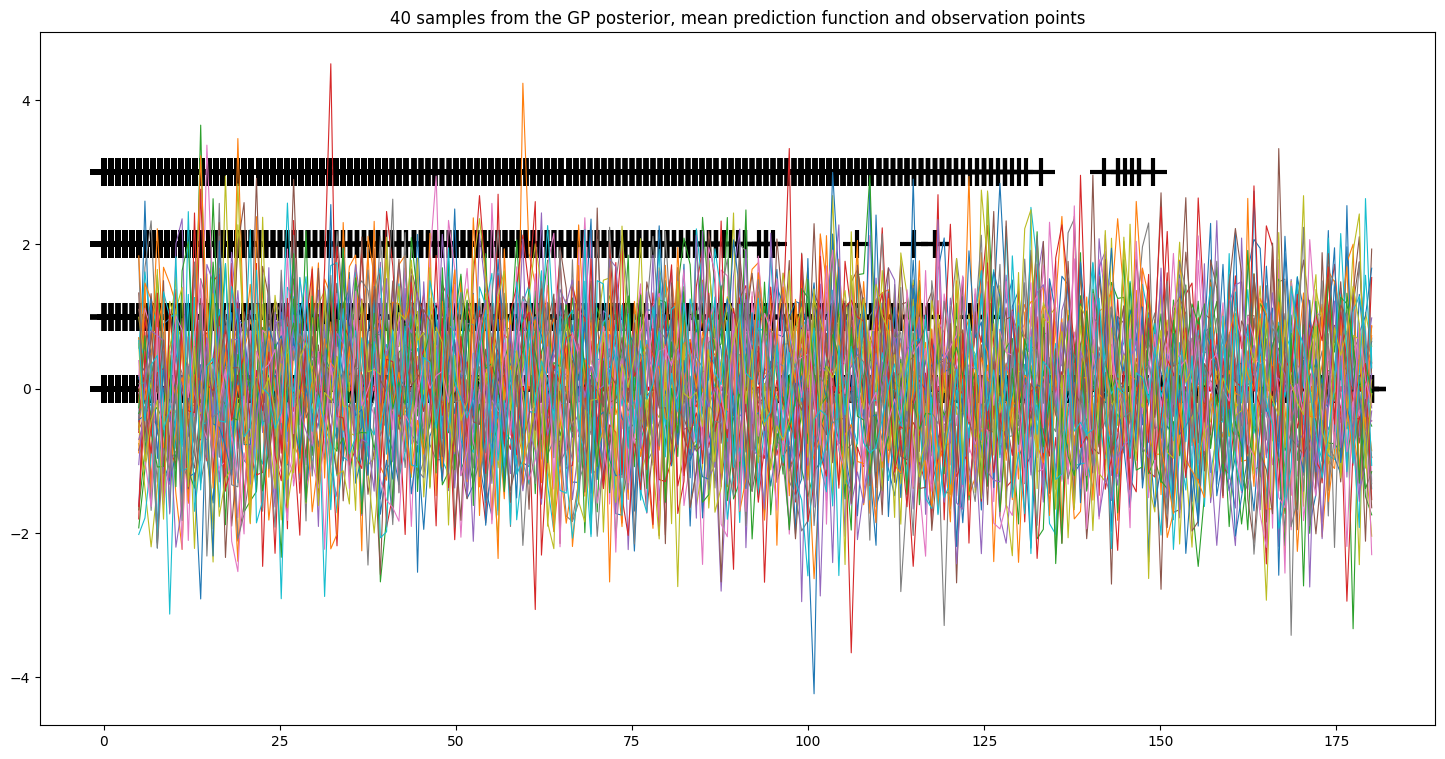

In [21]:
def kernel(a, b):
    kernelParameter_l = 0.1
    kernelParameter_sigma = 1.0
    sqdist = np.sum(a**2,axis=1).reshape(-1,1) + np.sum(b**2,1) - 2*np.dot(a, b.T)
    return kernelParameter_sigma * np.exp(-.5 * (1/kernelParameter_l) * sqdist)
# Sample some input points and noisy versions of the function evaluated at these points. 
N = len(df)    # number of existing observation points (training points).
n = 200        # number of test points.
s = 0.00005    # noise variance.
X = df[['CarCount', 'BusCount', 'BikeCount', 'TruckCount']].values  # N training points 
y = df['Traffic Situation Encoded']  # Target values

K = kernel(X, X)
L = np.linalg.cholesky(K + s*np.eye(N))     # line 1 
Xtest = np.zeros((n, X.shape[1]))
for i in range(X.shape[1]):
    Xtest[:, i] = np.linspace(min(X[:, i]), max(X[:, i]), n)
Lk = np.linalg.solve(L, kernel(X, Xtest))    # k_star = kernel(X, Xtest), calculating v := l\k_star
mu = np.dot(Lk.T, np.linalg.solve(L, y))     # \alpha = np.linalg.solve(L, y) 
# Compute the variance at our test points.
K_ = kernel(Xtest, Xtest)                    # k(x_star, x_star)        
s2 = np.diag(K_) - np.sum(Lk**2, axis=0)   
s = np.sqrt(s2)
L = np.linalg.cholesky(K_ + 1e-6*np.eye(n) - np.dot(Lk.T, Lk))
f_post = mu.reshape(-1,1) + np.dot(L, np.random.normal(size=(n, 40)))  # size=(n, m), m shown how many posterior  
plt.figure(figsize=(18, 9))
plt.plot(X, y, 'k+', markersize=20, markeredgewidth=3)
plt.plot(Xtest[:, 0], mu, 'r--', linewidth=3)
plt.plot(Xtest[:, 0], f_post, linewidth=0.8)
plt.title('40 samples from the GP posterior, mean prediction function and observation points')
plt.show()


In [22]:
df

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,Traffic Situation Encoded
0,12:00:00 AM,10,Tuesday,13,2,2,24,41,normal,3
1,12:15:00 AM,10,Tuesday,14,1,1,36,52,normal,3
2,12:30:00 AM,10,Tuesday,10,2,2,32,46,normal,3
3,12:45:00 AM,10,Tuesday,10,2,2,36,50,normal,3
4,1:00:00 AM,10,Tuesday,11,2,1,34,48,normal,3
...,...,...,...,...,...,...,...,...,...,...
5947,10:45:00 PM,9,Thursday,16,3,1,36,56,normal,3
5948,11:00:00 PM,9,Thursday,11,0,1,30,42,normal,3
5949,11:15:00 PM,9,Thursday,15,4,1,25,45,normal,3
5950,11:30:00 PM,9,Thursday,16,5,0,27,48,normal,3


In [6]:
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
model = SVC(kernel='rbf')
X = df[['CarCount', 'BikeCount', 'BusCount', 'TruckCount']].values
y = df['Traffic Situation Encoded'].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
model.fit(X_train, y_train)

SVC()

In [7]:
model.score(X_test,y_test)

0.9370277078085643

In [8]:
# Dictionary mapping numerical encoded values to string representations
encoded_to_string = {
    0: 'heavy',
    1: 'high',
    2: 'low',
    3: 'normal'
}

print("Enter no. of cars:")
car_count = int(input())
print("Enter no. of bikes:")
bike_count = int(input())
print("Enter no. of busses:")
bus_count = int(input())
print("Enter no. of trucks:")
truck_count = int(input())

# Make prediction
prediction = model.predict(np.array([[car_count, bike_count, bus_count, truck_count]]))[0]

# Convert numerical prediction to string representation
predicted_traffic_situation = encoded_to_string[prediction]

print("The Traffic situation is:", predicted_traffic_situation)

Enter no. of cars:
65
Enter no. of bikes:
80
Enter no. of busses:
43
Enter no. of trucks:
21
The Traffic situation is: heavy


In [13]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
X = df[['CarCount', 'BusCount', 'BikeCount', 'TruckCount']].values  
y = df['Traffic Situation Encoded']  
# Train the Gaussian process regression model with a composite kernel including RBF and WhiteKernel
kernel = 1.0 * RBF(length_scale=1.0) + WhiteKernel(noise_level=1.0)
gpr = GaussianProcessRegressor(kernel=kernel, random_state=0)
gpr.fit(X, y)
# Prompt for inputs
car_count = float(input("Enter the number of cars: "))
bus_count = float(input("Enter the number of buses: "))
bike_count = float(input("Enter the number of bikes: "))
truck_count = float(input("Enter the number of trucks: "))
day_of_the_week=input("Enter day of the week ")
X_new = np.array([[car_count, bus_count, bike_count, truck_count]])
predicted_encoded, predicted_std = gpr.predict(X_new, return_std=True)
# Print prediction and uncertainty
print(f"Predicted standard deviation: {predicted_std}")


Enter the number of cars: 65
Enter the number of buses: 80
Enter the number of bikes: 43
Enter the number of trucks: 21
Enter day of the week Friday
Predicted standard deviation: [1.14094405]
